In [1]:
from nltk import word_tokenize

def get_targets(post, brand_dict):
    
    ''' Take individual post and return only the words that appear in the brand dictionary (brands and models) '''
    
    # Tokenize post
    tokens = word_tokenize(post)
    
    # Remove all tokens but brands and models
    targets = [word.lower() for word in tokens if word.lower() in brand_dict.keys() or word.lower() in brand_dict.values()]
    
    return targets



def models_to_brands(targets, brand_dict):
    
    ''' Take list of brands and models and return new list where the models are converted to their respective brands '''
    
    # Create list to store brand names
    brands = []
    
    # Iterate through words
    for word in targets:
        
        # Convert models to brands and add to brand list
        if word in brand_dict.keys():
            brands.append(brand_dict[word])
            
        # Add brands that were mentioned to list
        elif word in brand_dict.values():
            brands.append(word)
        
        else:
            continue
        
    return brands



def get_unique_brands(brand_list):
    
    ''' Take list of brands and return new list that removes duplicates '''
    
    # Create list to store unique brand names
    unique_brands = []
    
    for brand in brand_list:
        if brand not in unique_brands:
            unique_brands.append(brand)
    
    return unique_brands

In [2]:
import pandas as pd

edmunds = pd.read_csv('Edmunds_Posts.csv')
posts = edmunds['Post'].dropna().tolist()
test = posts[0:100]

In [3]:
cars = pd.read_csv('cars.csv')

makes = cars['make']
models = cars['model']

# Convert make and model strings to unicode
keys = []
values = []
for model in models:
    keys.append(unicode(model, "ISO-8859-1"))

for make in makes:
    values.append(unicode(make, "ISO-8859-1"))
    

# Create dictionary mapping models to their respective brands
brand_dict = dict(zip(keys, values))

In [4]:
brand_dict

{u'128i': u'bmw',
 u'3-series': u'bmw',
 u'300M': u'chrysler',
 u'328i': u'bmw',
 u'330c': u'bmw',
 u'330ci': u'bmw',
 u'335d': u'bmw',
 u'335i': u'bmw',
 u'370z': u'nissan',
 u'3er': u'bmw',
 u'4-series': u'bmw',
 u'4Runner': u'toyota',
 u'5-series': u'bmw',
 u'528i': u'bmw',
 u'535i': u'bmw',
 u'5DR': u'honda',
 u'5er': u'bmw',
 u'6-series': u'bmw',
 u'640i': u'bmw',
 u'6i': u'mazda',
 u'6mt': u'infiniti',
 u'APV': u'suzuki',
 u'AZ-Offroad': u'mazda',
 u'AZ-Wagon': u'mazda',
 u'Accent': u'hyundai',
 u'Acty': u'honda',
 u'Aerio': u'suzuki',
 u'Agile': u'chevrolet',
 u'Allion': u'toyota',
 u'Alphard': u'toyota',
 u'Amaze': u'honda',
 u'Aria': u'honda',
 u'Atenza': u'mazda',
 u'Atos': u'hyundai',
 u'Atoz': u'hyundai',
 u'Aurion': u'toyota',
 u'Auris': u'toyota',
 u'Avalon': u'toyota',
 u'Avante': u'hyundai',
 u'Avanza': u'toyota',
 u'Avensis': u'toyota',
 u'Aveo': u'chevrolet',
 u'Axela': u'mazda',
 u'Axio': u'toyota',
 u'Aygo': u'toyota',
 u'BRZ': u'subaru',
 u'BT-50': u'mazda',
 u'Bel

In [5]:
import math

def count_brand_frequencies(posts, brand_dict):
    
    ''' Take list of posts and return a dictionary of frequency counts for each brand that was mentioned '''
    
    # Initialize frequency dictionary
    brand_counts = {}
    
    # Iterate through posts
    for post in posts:
        
        post = post.decode("utf8")
        
        # Retrieve brand names and models from post
        targets = get_targets(post, brand_dict)
        
        # Create list of brands that were mentioned in post (models converted to respective brands)
        brands = models_to_brands(targets, brand_dict)
        
        # Retrieve only unique brand names from list of brands that were mentioned
        unique_brands = get_unique_brands(brands)
        
        # Add each brand that was mentioned to total brand count
        for brand in unique_brands:
            if brand not in brand_counts.keys():
                brand_counts[brand] = 1
            else:
                brand_counts[brand] += 1
    
    return brand_counts

In [6]:
# Run on sample
count_brand_frequencies(test, brand_dict)

{u'acura': 13,
 u'audi': 29,
 u'bmw': 26,
 u'buick': 1,
 u'cadillac': 4,
 u'chevrolet': 2,
 u'chrysler': 2,
 u'ford': 11,
 u'honda': 8,
 u'hyundai': 1,
 u'infiniti': 10,
 u'lincoln': 4,
 u'mazda': 2,
 u'mercedes': 11,
 u'mercedes-benz': 5,
 u'mitsubishi': 2,
 u'nissan': 7,
 u'pontiac': 1,
 u'subaru': 2,
 u'suzuki': 2,
 u'toyota': 6,
 u'volkswagen': 8,
 u'volkwagen': 5,
 u'volvo': 8}

In [7]:
# Run on entire set of posts
brand_frequencies = count_brand_frequencies(posts, brand_dict)
brand_frequencies

{u'acura': 665,
 u'audi': 776,
 u'bmw': 2669,
 u'buick': 82,
 u'cadillac': 265,
 u'chevrolet': 166,
 u'chrysler': 88,
 u'dodge': 102,
 u'ford': 218,
 u'honda': 515,
 u'hyundai': 117,
 u'infiniti': 597,
 u'kia': 34,
 u'lincoln': 215,
 u'mazda': 135,
 u'mercedes': 194,
 u'mercedes-benz': 245,
 u'mercury': 11,
 u'mitsubishi': 41,
 u'nissan': 387,
 u'pontiac': 91,
 u'saturn': 24,
 u'subaru': 190,
 u'suzuki': 13,
 u'toyota': 402,
 u'volkswagen': 259,
 u'volkwagen': 77,
 u'volvo': 290}

In [8]:
df_brand_frequencies = pd.DataFrame(brand_frequencies.items(), columns=['brand','frequency'])
df_brand_frequencies = df_brand_frequencies.sort_values(by='frequency', ascending=False).reset_index().drop('index', axis=1)
df_brand_frequencies

,brand,frequency
0,bmw,2669
1,audi,776
2,acura,665
3,infiniti,597
4,honda,515
5,toyota,402
6,nissan,387
7,volvo,290
8,cadillac,265
9,volkswagen,259


Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


<Container object of 28 artists>

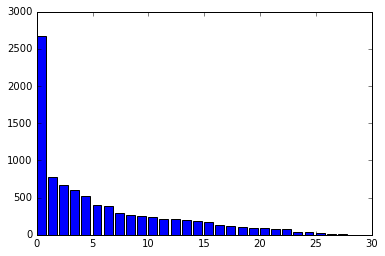

In [9]:
%pylab inline
bar(df_brand_frequencies.index, df_brand_frequencies['frequency'])

### Start of Part C
- Does reference code from above
- Some new functions created that are slightly different from above

In [10]:
from nltk.corpus import stopwords
import string

def get_attribute_targets(post, brand_dict):
    
    ''' Take individual post and return only the words that are not brand/model and not stopwords '''
    
    punctuations = list(string.punctuation)
    
    # Tokenize post    
    tokens = word_tokenize(post)
    
    # Remove stop words and punctuation
    targets = [word.lower() for word in tokens if word.lower() not in stopwords.words('english') and word.lower() not in ["cars","car", "like","one","would"]]
    #targets_punct = [word.lower() for word in targets if word.lower() not in punctuations] 
    targets_punct = [word.lower() for word in targets if word.lower().isalpha()] 
    
    # Remove brands and models
    targets_final = [word.lower() for word in targets_punct if word.lower() not in brand_dict.keys() and word.lower() not in brand_dict.values()]
    
    return targets_final

In [11]:
def words_to_attributes(targets, attribute_dict):
    ''' Take list of tokenized words and return a list with targets replaced with attributes'''
    
    # Create a list of tokens converted to attributes
    tokens = []
    
    # Iterate through words
    for word in targets:
        
        # Convert words to attributes and add to tokens list
        if word in attribute_dict.keys():
            tokens.append(attribute_dict[word])
        
        # Add all other words un-converted
        else:
            tokens.append(word)
    
    return tokens

In [12]:
def count_attribute_frequencies(posts, brand_dict, attribute_dict):
    ''' Take list of posts and return a dictionary of frequency counts for each non-brand that was mentioned '''
    
    # Initialize frequency dictionary
    word_counts = {}
    
    # Iterate through posts
    for post in posts:
        
        post = post.decode("utf8")
        
        # Retrieve attribute tokens from post
        targets = get_attribute_targets(post, brand_dict)
        
        # Create list of attributes (converted rom list), continue if none provided
        if len(attribute_dict.keys())>0:
            attributes = words_to_attributes(targets, attribute_dict)
        else:
            attributes = targets
        
        # Retrieve only unique tokens from list that were mentioned
        unique_tokens = get_unique_brands(attributes)
        
        # Add each token that was mentioned to total token count
        for token in unique_tokens:
            if token not in word_counts.keys():
                word_counts[token] = 1
            else:
                word_counts[token] += 1
                
    return word_counts

### Excluded code which first calculated the frequencies of all words
- Manually "mapped" some words to categories and created AttributesMap
- Unecessary extra computing, so excluded
<br>NE

In [13]:
attributes = pd.read_csv('AttributesMap.csv')

words = attributes['word']
categories = attributes['category']

# Convert words and category strings to unicode
keys = []
values = []
for word in words:
    keys.append(unicode(word, "ISO-8859-1"))

for cat in categories:
    values.append(unicode(cat, "ISO-8859-1"))

# Create dictionary mapping words to their respective categories
attribute_dict = dict(zip(keys, values))

In [14]:
# Map words to categories and count frequencies
attribute_frequencies_convert = count_attribute_frequencies(posts, brand_dict, attribute_dict)
attribute_frequencies_convert

{u'convolute': 1,
 u'unscientific': 1,
 u'finessed': 1,
 u'awdrl': 1,
 u'seatsare': 1,
 u'yellow': 9,
 u'four': 99,
 u'rocketing': 1,
 u'woods': 11,
 u'verses': 1,
 u'hanging': 8,
 u'onlder': 1,
 u'genre': 5,
 u'transferrable': 1,
 u'marching': 1,
 u'increase': 74,
 u'headand': 1,
 u'eligible': 2,
 u'snowing': 4,
 u'hordes': 1,
 u'objection': 1,
 u'wizardry': 2,
 u'exclusivly': 1,
 u'fingernails': 1,
 u'outwit': 1,
 u'turbodiesel': 7,
 u'underdogs': 1,
 u'screamers': 1,
 u'lord': 6,
 u'immature': 1,
 u'sprintsyet': 1,
 u'founding': 1,
 u'sinking': 3,
 u'inclement': 3,
 u'digit': 2,
 u'navigating': 1,
 u'regional': 2,
 u'deadining': 1,
 u'fwr': 1,
 u'hdtv': 2,
 u'replaces': 4,
 u'tantalizing': 1,
 u'foul': 4,
 u'classifications': 1,
 u'screaming': 12,
 u'markers': 3,
 u'advices': 1,
 u'wooded': 1,
 u'basics': 1,
 u'internally': 2,
 u'prize': 6,
 u'vibrational': 1,
 u'wooden': 1,
 u'synergy': 1,
 u'distate': 3,
 u'niceities': 1,
 u'wednesday': 5,
 u'piling': 1,
 u'oooo': 1,
 u'woudnt': 1

In [15]:
# Create dataframe
df_attribute_frequencies_convert = pd.DataFrame(attribute_frequencies_convert.items(), columns=['attribute','frequency'])

# Sort by frequency
df_attribute_frequencies_convert = df_attribute_frequencies_convert.sort_values(by='frequency', ascending=False).reset_index().drop('index', axis=1)

# Select top 5 most frequent
attribute_top_5 = df_attribute_frequencies_convert.ix[:4]['attribute']
attribute_top_5

0    performance
1         luxury
2         design
3          value
4        options
Name: attribute, dtype: object

### Top 5 have been exported to a text file "attribute5.txt"
- format is word1,word2,word3,word4,word5,